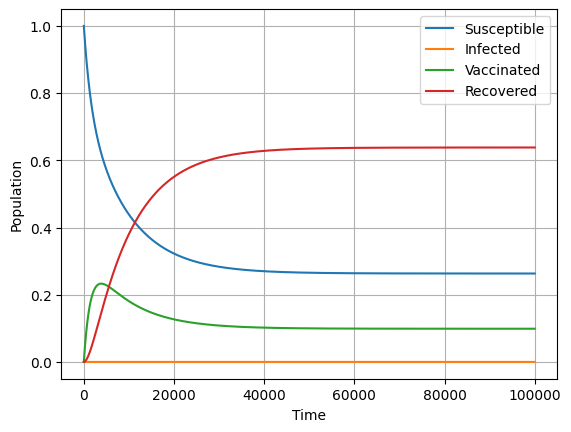

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1
# Initial number of infected and recovered individuals, I0, R0 and V0 .
I0, R0, V0 = 0.0001, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - V0

# Model parameters
alpha=  0.000035342      #Birth rate
beta = 0.03              #Infection per day
omega= 0.00020185        #Rate of first dose of vacination
gamma= 0.0476            #Recovered rate
roh=  1/4380             #Time between first and second dose
psi= 1/3650              #first dose wanes in immunity
mu= 0.000035342          # Death rate
# A grid of time points (in days)
t = np.linspace(0, 100000, 100000)

# The SIR model differential equations.
def model(y, t, alpha ,beta, gamma, mu, roh,psi, omega):
    S, I, V, R = y
    dSdt = mu*N - beta *S*I - mu *S - omega* S + psi* V  
    dVdt = omega*S - mu*V - psi*V - roh*V
    dIdt = beta * S*I - mu*I - gamma* I
    dRdt = gamma* I - mu* R + roh*V
    return dSdt, dIdt,dVdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0, V0
# Integrate the SIR equations over the time grid, t.def 
sol = odeint(model, y0, t, args=(alpha ,beta, gamma, mu, roh, psi, omega))


# Extract the results
S = sol[:, 0]
I = sol[:, 1]
V = sol[:, 2]
R = sol[:, 3]

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, V, label='Vaccinated')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


# Basic Reproduction Number (R0<0)


In [20]:
def plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t):
    sol = odeint(model, y0, t, args=(alpha ,beta, gamma, mu, roh, psi, omega))

    # Extract the results
    S = sol[:, 0]
    I = sol[:, 1]
    V = sol[:, 2]
    R = sol[:, 3]

    # Plot the results
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, V, label='Vaccinated')
    plt.plot(t, R, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()
    return S,I,V,R


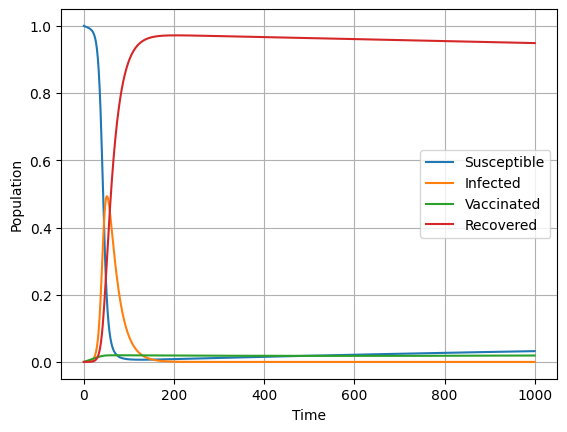

In [21]:
alpha= 0.261994381    #Birth rate
beta = 0.261994381    #Infection per day
omega= 0.000471498    #Rate of first dose of vacination
gamma= 0.0476         #Recovered rate
roh=  1/4380          #Time between first and second dose
psi= 1/3650           #first dose wanes in immunity
mu= 0.000035342       # Death rate
n = 1000

t = np.linspace(0, n, n)
S,I,V,R= plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t)


# Basic Reproduction Number (R0>0)



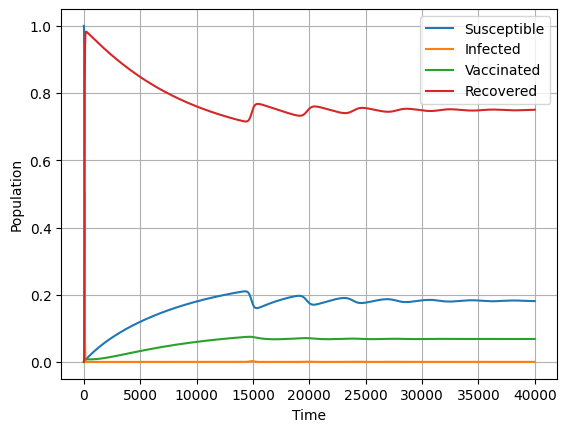

In [22]:
beta = 0.261994381      #Infection per day
omega= 0.00020185      #Rate of first dose of vacination
gamma= 0.0476           #Recovered rate
roh=  1/4380            #Time between first and second dose
psi= 1/3650             #first dose wanes in immunitygit 
mu= 0.000035342 
n = 40000
t = np.linspace(0, n, n)
S,I,V,R= plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t)

# Basic Reproduction Number (R0>0)